# Calculating Pvalues for the NLTK anlysis

This notebook compare the sentiments of all the quotes from Foxnews and the Ny times for year by year thanks to a T-test. Some violin plot are added to visualize the results. Some of the notable discorevies on this notebook are:
    - Their is a huge statistical significance for the difference between the negative sentiments of the NLTK analysis.
    - For the positive sentiments the statiscal significance is also notable

# Table of contents
1. [2015](#5)
2. [2016](#6)
3. [2017](#7)
4. [2018](#8)
5. [2019](#9)
6. [2020](#0)

In [1]:
import seaborn as sns
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np
import bz2
import json
from urllib.parse import urlparse
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import os
import glob
import pickle
from scipy import stats

In [5]:
sia = SentimentIntensityAnalyzer()

## 2015<a name="5"></a>

In [6]:
#Loading the data for this specific year 
years = [2015]
PATH = 'data/'
df_fox = pd.DataFrame(columns = ['quotation'])
df_ny = pd.DataFrame(columns = ['quotation'])

for y in years:
    df_yfox = pd.read_pickle(PATH+str(y)+'_'+'Fox_quotations.pkl')
    df_yfox = df_yfox.to_frame()
    df_fox = df_fox.append(df_yfox)
    df_yNy = pd.read_pickle(PATH+str(y)+'_'+'NY_quotations.pkl')
    df_yNy = df_yNy.to_frame()
    df_ny = df_ny.append(df_yNy)

In [7]:
#Creating the dataframe with all the sentiment values from the nltk analysis
dfp = pd.DataFrame(columns = ['emotion','value','journal'])

for quotation in df_fox['quotation']:
    
    result = sia.polarity_scores(quotation)
    pos = result["pos"]
    neg = result["neg"]
    newr = pd.Series(data = {'emotion': "positive", 'value': pos, 'journal': "foxnews"}, name = 'x')
    dfp = dfp.append(newr, ignore_index = True)
    newr = pd.Series(data = {'emotion': "negative", 'value': neg, 'journal': "foxnews"}, name = 'x')
    dfp = dfp.append(newr, ignore_index = True)
    
    
for quotation in df_ny['quotation']:
    
   
    result = sia.polarity_scores(quotation)
    pos = result["pos"]
    neg = result["neg"]
    newr = pd.Series(data = {'emotion': "positive", 'value': pos, 'journal': "nytimes"}, name = 'x')
    dfp = dfp.append(newr, ignore_index = True)
    newr = pd.Series(data = {'emotion': "negative", 'value': neg, 'journal': "nytimes"}, name = 'x')
    dfp = dfp.append(newr, ignore_index = True)

In [8]:
#Doing a T-test to compare Foxnews and the NY times for positive sentiments
res = stats.ttest_ind(dfp[dfp['journal'] == "foxnews"][dfp['emotion'] == "positive"]['value'],
                      dfp[dfp['journal'] == "nytimes"][dfp['emotion'] == "positive"]['value'],
                      equal_var = True)

#Doing a T-test to compare Foxnews and the NY times for negative sentiments
res2 = stats.ttest_ind(dfp[dfp['journal'] == "foxnews"][dfp['emotion'] == "negative"]['value'],
                       dfp[dfp['journal'] == "nytimes"][dfp['emotion'] == "negative"]['value'],
                       equal_var = True) 
print(res)
print(res2)

C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


Ttest_indResult(statistic=3.891349526109617, pvalue=9.973866718129864e-05)
Ttest_indResult(statistic=-1.3734122365924035, pvalue=0.16962663511162338)


C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


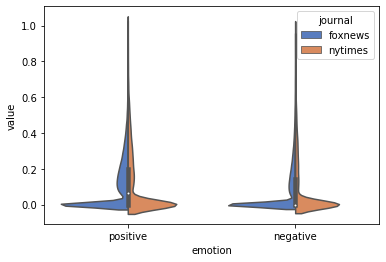

In [9]:
#Ploting a violin plot to show the distribution
sns.violinplot(x = 'emotion', y = "value", hue = "journal",
                    data = dfp, palette = "muted", split = True)

In [10]:
#Calculation the mean. a : positive sentiments Foxnews. b : positive sentiments NYtimes. c :negative sentiments Foxnews
#d :negative sentiments NYtimes

a = dfp[dfp['journal'] == "foxnews"][dfp['emotion'] == "positive"]['value'].mean()
b = dfp[dfp['journal'] == "nytimes"][dfp['emotion'] == "positive"]['value'].mean()
c = dfp[dfp['journal'] == "foxnews"][dfp['emotion'] == "negative"]['value'].mean()
d = dfp[dfp['journal'] == "nytimes"][dfp['emotion'] == "negative"]['value'].mean()
print(a)
print(b)
print(c)
print(d)

C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


0.11708682219635641
0.11142332730560565
0.08446171094070987
0.08629132007233252


C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [11]:
#Deleting dataframes to help the ram
lst = [dfp, df_fox, df_ny]
del lst   

## 2016<a name="6"></a>

In [12]:
#Loading the data for this specific year 
years = [2016]
PATH = 'data/'
df_fox = pd.DataFrame(columns = ['quotation'])
df_ny = pd.DataFrame(columns = ['quotation'])

for y in years:
    df_yfox = pd.read_pickle(PATH+str(y)+'_'+'Fox_quotations.pkl')
    df_yfox = df_yfox.to_frame()
    df_fox = df_fox.append(df_yfox)
    df_yNy = pd.read_pickle(PATH+str(y)+'_'+'NY_quotations.pkl')
    df_yNy = df_yNy.to_frame()
    df_ny = df_ny.append(df_yNy)

In [13]:
#Creating the dataframe with all the sentiment values from the nltk analysis
dfp = pd.DataFrame(columns = ['emotion','value','journal'])

for quotation in df_fox['quotation']:
    
    result = sia.polarity_scores(quotation)
    pos = result["pos"]
    neg = result["neg"]
    newr = pd.Series(data = {'emotion': "positive", 'value': pos, 'journal': "foxnews"}, name = 'x')
    dfp = dfp.append(newr, ignore_index = True)
    newr = pd.Series(data = {'emotion': "negative", 'value': neg, 'journal': "foxnews"}, name = 'x')
    dfp = dfp.append(newr, ignore_index = True)
    
    
for quotation in df_ny['quotation']:
    
    
    result = sia.polarity_scores(quotation)
    pos = result["pos"]
    neg = result["neg"]
    newr = pd.Series(data = {'emotion': "positive", 'value': pos, 'journal': "nytimes"}, name = 'x')
    dfp = dfp.append(newr, ignore_index = True)
    newr = pd.Series(data = {'emotion': "negative", 'value': neg, 'journal': "nytimes"}, name = 'x')
    dfp = dfp.append(newr, ignore_index = True)

In [14]:
#Doing a T-test to compare Foxnews and the NY times for positive sentiments
res = stats.ttest_ind(dfp[dfp['journal'] == "foxnews"][dfp['emotion'] == "positive"]['value'],
                      dfp[dfp['journal'] == "nytimes"][dfp['emotion'] == "positive"]['value'],
                      equal_var = True)

#Doing a T-test to compare Foxnews and the NY times for negative sentiments
res2 = stats.ttest_ind(dfp[dfp['journal'] == "foxnews"][dfp['emotion'] == "negative"]['value'],
                       dfp[dfp['journal'] == "nytimes"][dfp['emotion'] == "negative"]['value'],
                       equal_var = True) 
print(res)
print(res2)

C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Ttest_indResult(statistic=-4.339394972107099, pvalue=1.429361405381818e-05)
Ttest_indResult(statistic=23.841689877005308, pvalue=1.753718290151476e-125)


C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


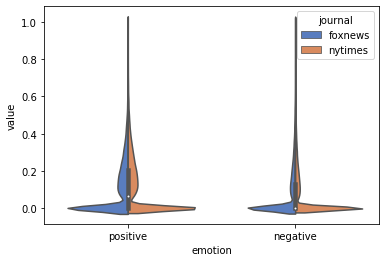

In [15]:
#Ploting a violin plot to show the distribution
sns.violinplot(x = 'emotion', y = "value", hue = "journal",
                    data = dfp, palette = "muted", split = True)

In [16]:
#Calculation the mean. a : positive sentiments Foxnews. b : positive sentiments NYtimes. c :negative sentiments Foxnews
#d :negative sentiments NYtimes

a = dfp[dfp['journal'] == "foxnews"][dfp['emotion'] == "positive"]['value'].mean()
b = dfp[dfp['journal'] == "nytimes"][dfp['emotion'] == "positive"]['value'].mean()
c = dfp[dfp['journal'] == "foxnews"][dfp['emotion'] == "negative"]['value'].mean()
d = dfp[dfp['journal'] == "nytimes"][dfp['emotion'] == "negative"]['value'].mean()
print(a)
print(b)
print(c)
print(d)

C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


0.11589665152665851
0.11877752310673596
0.08822022265843299
0.07420822152653582


C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\François CHARROIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [17]:
#Deleting dataframes to help the ram
lst = [dfp, df_fox, df_ny]
del lst 

## 2017<a name="7"></a>

In [18]:
#Loading the data for this specific year 
years = [2017]
PATH = 'data/'
df_fox = pd.DataFrame(columns = ['quotation'])
df_ny = pd.DataFrame(columns = ['quotation'])

for y in years:
    df_yfox = pd.read_pickle(PATH+str(y)+'_'+'Fox_quotations.pkl')
    df_yfox = df_yfox.to_frame()
    df_fox = df_fox.append(df_yfox)
    df_yNy = pd.read_pickle(PATH+str(y)+'_'+'NY_quotations.pkl')
    df_yNy = df_yNy.to_frame()
    df_ny = df_ny.append(df_yNy)

In [ ]:
#Creating the dataframe with all the sentiment values from the nltk analysis
dfp = pd.DataFrame(columns = ['emotion','value','journal'])

for quotation in df_fox['quotation']:
    
    result = sia.polarity_scores(quotation)
    pos = result["pos"]
    neg = result["neg"]
    newr = pd.Series(data = {'emotion': "positive", 'value': pos, 'journal': "foxnews"}, name = 'x')
    dfp = dfp.append(newr, ignore_index = True)
    newr = pd.Series(data = {'emotion': "negative", 'value': neg, 'journal': "foxnews"}, name = 'x')
    dfp = dfp.append(newr, ignore_index = True)
    
    
for quotation in df_ny['quotation']:
    
    
    result = sia.polarity_scores(quotation)
    pos = result["pos"]
    neg = result["neg"]
    newr = pd.Series(data = {'emotion': "positive", 'value': pos, 'journal': "nytimes"}, name = 'x')
    dfp = dfp.append(newr, ignore_index = True)
    newr = pd.Series(data = {'emotion': "negative", 'value': neg, 'journal': "nytimes"}, name = 'x')
    dfp = dfp.append(newr, ignore_index = True)

In [ ]:
#Doing a T-test to compare Foxnews and the NY times for positive sentiments
res = stats.ttest_ind(dfp[dfp['journal'] == "foxnews"][dfp['emotion'] == "positive"]['value'],
                      dfp[dfp['journal'] == "nytimes"][dfp['emotion'] == "positive"]['value'],
                      equal_var = True)

#Doing a T-test to compare Foxnews and the NY times for negative sentiments
res2 = stats.ttest_ind(dfp[dfp['journal'] == "foxnews"][dfp['emotion'] == "negative"]['value'],
                       dfp[dfp['journal'] == "nytimes"][dfp['emotion'] == "negative"]['value'],
                       equal_var = True) 
print(res)
print(res2)

In [ ]:
#Ploting a violin plot to show the distribution
sns.violinplot(x = 'emotion', y = "value", hue = "journal",
                    data = dfp, palette = "muted", split = True)

In [ ]:
#Calculation the mean. a : positive sentiments Foxnews. b : positive sentiments NYtimes. c :negative sentiments Foxnews
#d :negative sentiments NYtimes

a = dfp[dfp['journal'] == "foxnews"][dfp['emotion'] == "positive"]['value'].mean()
b = dfp[dfp['journal'] == "nytimes"][dfp['emotion'] == "positive"]['value'].mean()
c = dfp[dfp['journal'] == "foxnews"][dfp['emotion'] == "negative"]['value'].mean()
d = dfp[dfp['journal'] == "nytimes"][dfp['emotion'] == "negative"]['value'].mean()
print(a)
print(b)
print(c)
print(d)

In [ ]:
#Deleting dataframes to help the ram
lst = [dfp, df_fox, df_ny]
del lst 

## 2018<a name="8"></a>

In [ ]:
#Loading the data for this specific year 
years = [2018]
PATH = 'data/'
df_fox = pd.DataFrame(columns = ['quotation'])
df_ny = pd.DataFrame(columns = ['quotation'])

for y in years:
    df_yfox = pd.read_pickle(PATH+str(y)+'_'+'Fox_quotations.pkl')
    df_yfox = df_yfox.to_frame()
    df_fox = df_fox.append(df_yfox)
    df_yNy = pd.read_pickle(PATH+str(y)+'_'+'NY_quotations.pkl')
    df_yNy = df_yNy.to_frame()
    df_ny = df_ny.append(df_yNy)

In [ ]:
#Creating the dataframe with all the sentiment values from the nltk analysis
dfp = pd.DataFrame(columns = ['emotion','value','journal'])

for quotation in df_fox['quotation']:
    
    result = sia.polarity_scores(quotation)
    pos = result["pos"]
    neg = result["neg"]
    newr = pd.Series(data = {'emotion': "positive", 'value': pos, 'journal': "foxnews"}, name = 'x')
    dfp = dfp.append(newr, ignore_index = True)
    newr = pd.Series(data = {'emotion': "negative", 'value': neg, 'journal': "foxnews"}, name = 'x')
    dfp = dfp.append(newr, ignore_index = True)
    
    
for quotation in df_ny['quotation']:
    
    
    result = sia.polarity_scores(quotation)
    pos = result["pos"]
    neg = result["neg"]
    newr = pd.Series(data = {'emotion': "positive", 'value': pos, 'journal': "nytimes"}, name = 'x')
    dfp = dfp.append(newr, ignore_index = True)
    newr = pd.Series(data = {'emotion': "negative", 'value': neg, 'journal': "nytimes"}, name = 'x')
    dfp = dfp.append(newr, ignore_index = True)

In [ ]:
#Doing a T-test to compare Foxnews and the NY times for positive sentiments
res = stats.ttest_ind(dfp[dfp['journal'] == "foxnews"][dfp['emotion'] == "positive"]['value'],
                      dfp[dfp['journal'] == "nytimes"][dfp['emotion'] == "positive"]['value'],
                      equal_var = True)

#Doing a T-test to compare Foxnews and the NY times for negative sentiments
res2 = stats.ttest_ind(dfp[dfp['journal'] == "foxnews"][dfp['emotion'] == "negative"]['value'],
                       dfp[dfp['journal'] == "nytimes"][dfp['emotion'] == "negative"]['value'],
                       equal_var = True) 
print(res)
print(res2)

In [ ]:
#Ploting a violin plot to show the distribution
sns.violinplot(x = 'emotion', y = "value", hue = "journal",
                    data = dfp, palette = "muted", split = True)

In [ ]:
#Calculation the mean. a : positive sentiments Foxnews. b : positive sentiments NYtimes. c :negative sentiments Foxnews
#d :negative sentiments NYtimes

a = dfp[dfp['journal'] == "foxnews"][dfp['emotion'] == "positive"]['value'].mean()
b = dfp[dfp['journal'] == "nytimes"][dfp['emotion'] == "positive"]['value'].mean()
c = dfp[dfp['journal'] == "foxnews"][dfp['emotion'] == "negative"]['value'].mean()
d = dfp[dfp['journal'] == "nytimes"][dfp['emotion'] == "negative"]['value'].mean()
print(a)
print(b)
print(c)
print(d)

In [ ]:
#Deleting dataframes to help the ram
lst = [dfp, df_fox, df_ny]
del lst 

## 2019<a name="9"></a>

In [ ]:
#Loading the data for this specific year 
years = [2019]
PATH = 'data/'
df_fox = pd.DataFrame(columns = ['quotation'])
df_ny = pd.DataFrame(columns = ['quotation'])

for y in years:
    df_yfox = pd.read_pickle(PATH+str(y)+'_'+'Fox_quotations.pkl')
    df_yfox = df_yfox.to_frame()
    df_fox = df_fox.append(df_yfox)
    df_yNy = pd.read_pickle(PATH+str(y)+'_'+'NY_quotations.pkl')
    df_yNy = df_yNy.to_frame()
    df_ny = df_ny.append(df_yNy)

In [ ]:
#Creating the dataframe with all the sentiment values from the nltk analysis
dfp = pd.DataFrame(columns = ['emotion','value','journal'])

for quotation in df_fox['quotation']:
    
    result = sia.polarity_scores(quotation)
    pos = result["pos"]
    neg = result["neg"]
    newr = pd.Series(data = {'emotion': "positive", 'value': pos, 'journal': "foxnews"}, name = 'x')
    dfp = dfp.append(newr, ignore_index = True)
    newr = pd.Series(data = {'emotion': "negative", 'value': neg, 'journal': "foxnews"}, name = 'x')
    dfp = dfp.append(newr, ignore_index = True)
    
    
for quotation in df_ny['quotation']:
    
    result = sia.polarity_scores(quotation)
    pos = result["pos"]
    neg = result["neg"]
    newr = pd.Series(data = {'emotion': "positive", 'value': pos, 'journal': "nytimes"}, name = 'x')
    dfp = dfp.append(newr, ignore_index = True)
    newr = pd.Series(data = {'emotion': "negative", 'value': neg, 'journal': "nytimes"}, name = 'x')
    dfp = dfp.append(newr, ignore_index = True)

In [ ]:
#Doing a T-test to compare Foxnews and the NY times for positive sentiments
res = stats.ttest_ind(dfp[dfp['journal'] == "foxnews"][dfp['emotion'] == "positive"]['value'],
                      dfp[dfp['journal'] == "nytimes"][dfp['emotion'] == "positive"]['value'],
                      equal_var = True)

#Doing a T-test to compare Foxnews and the NY times for negative sentiments
res2 = stats.ttest_ind(dfp[dfp['journal'] == "foxnews"][dfp['emotion'] == "negative"]['value'],
                       dfp[dfp['journal'] == "nytimes"][dfp['emotion'] == "negative"]['value'],
                       equal_var = True) 
print(res)
print(res2)

In [ ]:
#Ploting a violin plot to show the distribution
sns.violinplot(x = 'emotion', y = "value", hue = "journal",
                    data = dfp, palette = "muted", split = True)

In [ ]:
#Calculation the mean. a : positive sentiments Foxnews. b : positive sentiments NYtimes. c :negative sentiments Foxnews
#d :negative sentiments NYtimes

a = dfp[dfp['journal'] == "foxnews"][dfp['emotion'] == "positive"]['value'].mean()
b = dfp[dfp['journal'] == "nytimes"][dfp['emotion'] == "positive"]['value'].mean()
c = dfp[dfp['journal'] == "foxnews"][dfp['emotion'] == "negative"]['value'].mean()
d = dfp[dfp['journal'] == "nytimes"][dfp['emotion'] == "negative"]['value'].mean()
print(a)
print(b)
print(c)
print(d)

In [ ]:
#Deleting dataframes to help the ram
lst = [dfp, df_fox, df_ny]
del lst 

## 2020<a name="0"></a>

In [ ]:
#Loading the data for this specific year 
years = [2020]
PATH = 'data/'
df_fox = pd.DataFrame(columns = ['quotation'])
df_ny = pd.DataFrame(columns = ['quotation'])

for y in years:
    df_yfox = pd.read_pickle(PATH+str(y)+'_'+'Fox_quotations.pkl')
    df_yfox = df_yfox.to_frame()
    df_fox = df_fox.append(df_yfox)
    df_yNy = pd.read_pickle(PATH+str(y)+'_'+'NY_quotations.pkl')
    df_yNy = df_yNy.to_frame()
    df_ny = df_ny.append(df_yNy)

In [ ]:
#Creating the dataframe with all the sentiment values from the nltk analysis
dfp = pd.DataFrame(columns = ['emotion','value','journal'])

for quotation in df_fox['quotation']:
    
    result = sia.polarity_scores(quotation)
    pos = result["pos"]
    neg = result["neg"]
    newr = pd.Series(data = {'emotion': "positive", 'value': pos, 'journal': "foxnews"}, name = 'x')
    dfp = dfp.append(newr, ignore_index = True)
    newr = pd.Series(data = {'emotion': "negative", 'value': neg, 'journal': "foxnews"}, name = 'x')
    dfp = dfp.append(newr, ignore_index = True)
    
    
for quotation in df_ny['quotation']:
   
    result = sia.polarity_scores(quotation)
    pos = result["pos"]
    neg = result["neg"]
    newr = pd.Series(data = {'emotion': "positive", 'value': pos, 'journal': "nytimes"}, name = 'x')
    dfp = dfp.append(newr, ignore_index = True)
    newr = pd.Series(data = {'emotion': "negative", 'value': neg, 'journal': "nytimes"}, name = 'x')
    dfp = dfp.append(newr, ignore_index = True)

In [ ]:
#Doing a T-test to compare Foxnews and the NY times for positive sentiments
res = stats.ttest_ind(dfp[dfp['journal'] == "foxnews"][dfp['emotion'] == "positive"]['value'],
                      dfp[dfp['journal'] == "nytimes"][dfp['emotion'] == "positive"]['value'],
                      equal_var = True)

#Doing a T-test to compare Foxnews and the NY times for negative sentiments
res2 = stats.ttest_ind(dfp[dfp['journal'] == "foxnews"][dfp['emotion'] == "negative"]['value'],
                       dfp[dfp['journal'] == "nytimes"][dfp['emotion'] == "negative"]['value'],
                       equal_var = True) 
print(res)
print(res2)

Ttest_indResult(statistic=9.134493208848632, pvalue=6.694156893481628e-20)

Ttest_indResult(statistic=3.1699144410929136, pvalue=0.00152531588795104)

In [ ]:
#Ploting a violin plot to show the distribution
sns.violinplot(x = 'emotion', y = "value", hue = "journal",
                    data = dfp, palette = "muted", split = True)

In [ ]:
#Calculation the mean. a : positive sentiments Foxnews. b : positive sentiments NYtimes. c :negative sentiments Foxnews
#d :negative sentiments NYtimes

a = dfp[dfp['journal'] == "foxnews"][dfp['emotion'] == "positive"]['value'].mean()
b = dfp[dfp['journal'] == "nytimes"][dfp['emotion'] == "positive"]['value'].mean()
c = dfp[dfp['journal'] == "foxnews"][dfp['emotion'] == "negative"]['value'].mean()
d = dfp[dfp['journal'] == "nytimes"][dfp['emotion'] == "negative"]['value'].mean()
print(a)
print(b)
print(c)
print(d)

In [ ]:
#Deleting dataframes to help the ram
lst = [dfp, df_fox, df_ny]
del lst 